In [1]:
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, LeakyReLU, Flatten, Input, LSTM, Reshape, TimeDistributed
from tensorflow.keras.models import Model
import argparse
import matplotlib.pyplot as plt
import sys

2024-08-31 14:44:45.329807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
np.set_printoptions(threshold=5)
#np.set_printoptions(threshold=sys.maxsize)

Importing Train dataset

In [3]:
dset = h5py.File("sdr_wifi_train.hdf5", 'r')
X = dset['X'][()]
y = dset['y'][()]

In [4]:
X.shape

(287971, 128, 2)

One hot encoding

In [ ]:
A = y

matches0 = np.where(np.all(A == [0, 0, 0, 0], axis=1))[0]
matches1 = np.where(np.all(A == [0, 0, 0, 1], axis=1))[0]
matches2 = np.where(np.all(A == [0, 0, 1, 0], axis=1))[0]
matches3 = np.where(np.all(A == [0, 0, 1, 1], axis=1))[0]
matches4 = np.where(np.all(A == [0, 1, 0, 0], axis=1))[0]
matches5 = np.where(np.all(A == [0, 1, 0, 1], axis=1))[0]
matches6 = np.where(np.all(A == [0, 1, 1, 0], axis=1))[0]
matches7 = np.where(np.all(A == [0, 1, 1, 1], axis=1))[0]
matches8 = np.where(np.all(A == [1, 0, 0, 0], axis=1))[0]
matches9 = np.where(np.all(A == [1, 0, 0, 1], axis=1))[0]
matches10 = np.where(np.all(A == [1, 0, 1, 0], axis=1))[0]
matches11 = np.where(np.all(A == [1, 0, 1, 1], axis=1))[0]
matches12 = np.where(np.all(A == [1, 1, 0, 0], axis=1))[0]
matches13 = np.where(np.all(A == [1, 1, 0, 1], axis=1))[0]
matches14 = np.where(np.all(A == [1, 1, 1, 0], axis=1))[0]
matches15 = np.where(np.all(A == [1, 1, 1, 1], axis=1))[0]

my_list = list(A)

value_to_replace = 0
for index in matches0:
    my_list[index] = value_to_replace
value_to_replace = 1
for index in matches1:
    my_list[index] = value_to_replace
value_to_replace = 2
for index in matches2:
    my_list[index] = value_to_replace
value_to_replace = 3
for index in matches3:
    my_list[index] = value_to_replace
value_to_replace = 4
for index in matches4:
    my_list[index] = value_to_replace
value_to_replace = 5
for index in matches5:
    my_list[index] = value_to_replace
value_to_replace = 6
for index in matches6:
    my_list[index] = value_to_replace
value_to_replace = 7
for index in matches7:
    my_list[index] = value_to_replace
value_to_replace = 8
for index in matches8:
    my_list[index] = value_to_replace
value_to_replace = 9
for index in matches9:
    my_list[index] = value_to_replace
value_to_replace = 10
for index in matches10:
    my_list[index] = value_to_replace
value_to_replace = 11
for index in matches11:
    my_list[index] = value_to_replace
value_to_replace = 12
for index in matches12:
    my_list[index] = value_to_replace
value_to_replace = 13
for index in matches13:
    my_list[index] = value_to_replace
value_to_replace = 14
for index in matches14:
    my_list[index] = value_to_replace
value_to_replace = 15
for index in matches15:
    my_list[index] = value_to_replace

y_label = np.array(my_list)

my_dict = {0: [0, 0, 0, 0],
           1: [0, 0, 0, 1],
           2: [0, 0, 1, 0],
           3: [0, 0, 1, 1],
           4: [0, 1, 0, 0],
           5: [0, 1, 0, 1],
           6: [0, 1, 1, 0],
           7: [0, 1, 1, 1],
           8: [1, 0, 0, 0],
           9: [1, 0, 0, 1],
           10: [1, 0, 1, 0],
           11: [1, 0, 1, 1],
           12: [1, 1, 0, 0],
           13: [1, 1, 0, 1],
           14: [1, 1, 1, 0],
           15: [1, 1, 1, 1]}

Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128,2)),
    tf.keras.layers.Reshape(target_shape=(128,2,1)),
    tf.keras.layers.Conv2D(32, (3, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 2), activation='relu', padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 128, 2, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 128, 2, 32)        224       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 2, 32)        6176      
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
Total params: 1057168 (4.03 MB)
Trainable params: 105716

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 15
validation_split = 0.1

history = model.fit(X, y_label, epochs=NUM_EPOCHS, validation_split=validation_split,verbose =1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


8100/8100 [==============================] - 304s 37ms/step - loss: 1.1318 - accuracy: 0.6454 - val_loss: 0.8911 - val_accuracy: 0.7045
Epoch 2/15
8100/8100 [==============================] - 273s 34ms/step - loss: 0.7389 - accuracy: 0.7506 - val_loss: 0.6613 - val_accuracy: 0.7678
Epoch 3/15
8100/8100 [==============================] - 264s 33ms/step - loss: 0.6049 - accuracy: 0.7825 - val_loss: 0.5542 - val_accuracy: 0.7960
Epoch 4/15
8100/8100 [==============================] - 261s 32ms/step - loss: 0.4890 - accuracy: 0.8242 - val_loss: 0.4013 - val_accuracy: 0.8677
Epoch 5/15
8100/8100 [==============================] - 265s 33ms/step - loss: 0.2231 - accuracy: 0.9329 - val_loss: 0.1402 - val_accuracy: 0.9692
Epoch 6/15
8100/8100 [==============================] - 259s 32ms/step - loss: 0.1047 - accuracy: 0.9699 - val_loss: 0.1288 - val_accuracy: 0.9649
Epoch 7/15
8100/8100 [==============================] - 263s 32ms/step - loss: 0.0898 - accuracy: 0.9722 - val_loss: 0.1121 - val

In [ ]:
# model.save("Model_keras.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Accuracy vs epochs

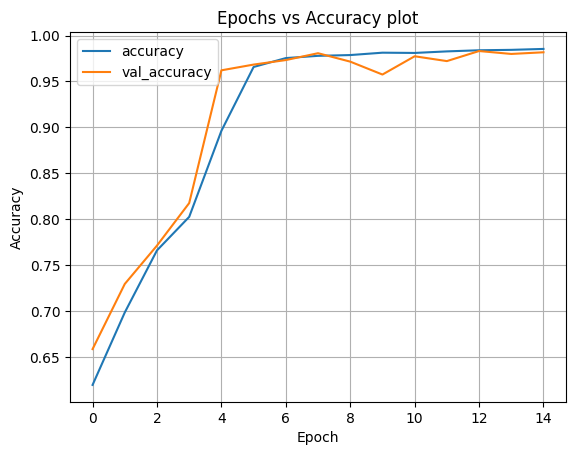

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epochs vs Accuracy plot')
plt.legend()
plt.grid(True)
plt.show()

loss vs epochs

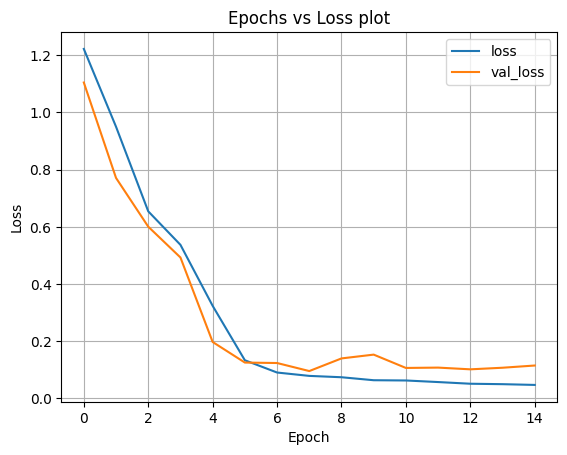

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs Loss plot')
plt.legend()
plt.grid(True)
plt.show()

Testing dataset

In [5]:
test_dset = h5py.File("sdr_wifi_test.hdf5", 'r')
X_test = test_dset['X'][()]
y_test = test_dset['y'][()]

In [6]:
X_test.shape

(31997, 128, 2)

In [ ]:
B = y_test

test_matches0 = np.where(np.all(B == [0, 0, 0, 0], axis=1))[0]
test_matches1 = np.where(np.all(B == [0, 0, 0, 1], axis=1))[0]
test_matches2 = np.where(np.all(B == [0, 0, 1, 0], axis=1))[0]
test_matches3 = np.where(np.all(B == [0, 0, 1, 1], axis=1))[0]
test_matches4 = np.where(np.all(B == [0, 1, 0, 0], axis=1))[0]
test_matches5 = np.where(np.all(B == [0, 1, 0, 1], axis=1))[0]
test_matches6 = np.where(np.all(B == [0, 1, 1, 0], axis=1))[0]
test_matches7 = np.where(np.all(B == [0, 1, 1, 1], axis=1))[0]
test_matches8 = np.where(np.all(B == [1, 0, 0, 0], axis=1))[0]
test_matches9 = np.where(np.all(B == [1, 0, 0, 1], axis=1))[0]
test_matches10 = np.where(np.all(B == [1, 0, 1, 0], axis=1))[0]
test_matches11 = np.where(np.all(B == [1, 0, 1, 1], axis=1))[0]
test_matches12 = np.where(np.all(B == [1, 1, 0, 0], axis=1))[0]
test_matches13 = np.where(np.all(B == [1, 1, 0, 1], axis=1))[0]
test_matches14 = np.where(np.all(B == [1, 1, 1, 0], axis=1))[0]
test_matches15 = np.where(np.all(B == [1, 1, 1, 1], axis=1))[0]

test_list = list(B)


value_to_replace = 0
for index in test_matches0:
    test_list[index] = value_to_replace
value_to_replace = 1
for index in test_matches1:
    test_list[index] = value_to_replace
value_to_replace = 2
for index in test_matches2:
    test_list[index] = value_to_replace
value_to_replace = 3
for index in test_matches3:
    test_list[index] = value_to_replace
value_to_replace = 4
for index in test_matches4:
    test_list[index] = value_to_replace
value_to_replace = 5
for index in test_matches5:
    test_list[index] = value_to_replace
value_to_replace = 6
for index in test_matches6:
    test_list[index] = value_to_replace
value_to_replace = 7
for index in test_matches7:
    test_list[index] = value_to_replace
value_to_replace = 8
for index in test_matches8:
    test_list[index] = value_to_replace
value_to_replace = 9
for index in test_matches9:
    test_list[index] = value_to_replace
value_to_replace = 10
for index in test_matches10:
    test_list[index] = value_to_replace
value_to_replace = 11
for index in test_matches11:
    test_list[index] = value_to_replace
value_to_replace = 12
for index in test_matches12:
    test_list[index] = value_to_replace
value_to_replace = 13
for index in test_matches13:
    test_list[index] = value_to_replace
value_to_replace = 14
for index in test_matches14:
    test_list[index] = value_to_replace
value_to_replace = 15
for index in test_matches15:
    test_list[index] = value_to_replace

test_label = np.array(test_list)

In [ ]:
score = model.evaluate(X_test, test_label, verbose=1)
print('Loss: ' + str(score[0]))
print('Acc: ' + str(score[1]))

1000/1000 [==============================] - 3s 3ms/step - loss: 0.2255 - accuracy: 0.9373
Loss: 0.2255161702632904
Acc: 0.9373066425323486
